In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
data = pd.read_csv("Transformed_Housing_Data2.csv")

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21609 non-null  int64  
 1   Sale_Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   No of Times Visited                        21609 non-null  int64  
 8   Overall Grade                              21609 non-null  int64  
 9   Area of the House from Basement (in Sqft)  21609 non-null  float64
 10  Basement Area (in Sqft

## Scaling the dataset

In [6]:
from sklearn.preprocessing import StandardScaler as Ss
scaler = Ss()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X , columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,Date House was Sold,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,zip_group_Zip_2,zip_group_Zip_3,zip_group_Zip_4,zip_group_Zip_5,zip_group_Zip_6,zip_group_Zip_7,zip_group_Zip_8,zip_group_Zip_9,Waterfront View_Yes,EverRenovated_yes
0,0.690603,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
1,0.690603,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,4.758385
2,-1.448010,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
3,0.690603,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
4,-1.448010,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155


## After applying scaling, X becomes a NumPy array (which has no column names). So, we convert it back into a DataFrame using:
## X = pd.DataFrame(data=X, columns=data.drop(columns=['Sale_Price']).columns)

## *****************************************************************************************

# Checking and REmoving Multicollinearity

In [10]:
X = X.drop(columns = ['Date House was Sold','Renovated Year'])
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,zip_group_Zip_2,zip_group_Zip_3,zip_group_Zip_4,zip_group_Zip_5,zip_group_Zip_6,zip_group_Zip_7,zip_group_Zip_8,zip_group_Zip_9,Waterfront View_Yes,EverRenovated_yes
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,-0.006578,0.018573
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,0.063761,0.050282
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253,0.103841,0.055111
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,0.021605,0.007736
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,0.023719,0.006297
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,0.401856,0.104051
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,0.070332,0.010010
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398,0.072099,0.023202
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,0.080595,0.070969
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492,0.026149,0.225182


In [11]:
## pairs 0f independent variables with corellation grater than 0.5 
k = X.corr()
# below is called list comprehension method
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (abs(k.loc[i,j]) > 0.5)&(i!=j)]
z , len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Age of House (in Years)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the Hou

## Calculating VIF

In [13]:
 #importing varience _inflation _factor function from the Statsmodels 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X
VIF = pd.Series([variance_inflation_factor(vif_data.values , i ) for i in range(vif_data.shape[1])] , index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years_since_Renovation                          2.788098
price_condition                                      inf
ConditionOfTheHouse_Excellent                        inf
ConditionOfTheHouse_Fair       

In [14]:
VIF[VIF == VIF.max()].index[0]

'price_condition'

In [15]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values , i) for i in range(data.shape[1])] , index = data.columns)
    if vif.max() > 5 :
        print(vif[vif == vif.max()].index[0] , 'has been deleted')
        data = data.drop(columns = [vif [vif == vif.max()].index[0]] )
        return data
    else :
        print('No Multicollinearity present anymore')
        return data
        

In [16]:
for i in range (7) :
    vif_data = MC_remover(vif_data)

vif_data.head()

price_condition has been deleted
Flat Area (in Sqft) has been deleted
ConditionOfTheHouse_Fair has been deleted
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,zip_group_Zip_2,zip_group_Zip_3,zip_group_Zip_4,zip_group_Zip_5,zip_group_Zip_6,zip_group_Zip_7,zip_group_Zip_8,zip_group_Zip_9,Waterfront View_Yes,EverRenovated_yes
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,4.758385
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155


In [17]:
## Calculating Remaning ViF of each columns
VIF = pd.Series([variance_inflation_factor(vif_data.values , i) for i in range (vif_data.shape[1]) ] , index = vif_data.columns)
VIF , len(VIF)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years_since_Renovation                       2.788064
 ConditionOfTheHouse_Excellent                1.206487
 ConditionOfTheHouse_Good                     1.251488
 ConditionOfTheHouse_Okay                     1.025386
 zip_group_Zip_1                              1.538211
 zip_group

## End ************************ MUL COLLINEARITy *******************************

# TRAIN / TEST set

In [59]:
x = vif_data['','','']
y = Y

In [63]:
vif_data.head()

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,zip_group_Zip_2,zip_group_Zip_3,zip_group_Zip_4,zip_group_Zip_5,zip_group_Zip_6,zip_group_Zip_7,zip_group_Zip_8,zip_group_Zip_9,Waterfront View_Yes,EverRenovated_yes
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,4.758385
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.087181,-0.210155


In [21]:
from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(x , y , test_size = 0.3 , random_state = 102)

In [22]:
 x_train.shape , x_test.shape

((15126, 26), (6483, 26))

# Implementation of LR

In [24]:
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
lr.coef_

array([-5604.52738481, 12799.49209173,  9380.24819604,  8669.59048112,
       28041.61485726, 63466.81985565, 73382.77046397, 32984.50143169,
       41549.5489638 , 14245.09458715, -4469.51577086, -9301.85850228,
       11319.21589287,  2003.52502006, -3425.92835527, 14860.45429556,
       44211.85359595, 73471.53640242, 89667.25112332, 59895.41456568,
       78653.91428487, 42757.97542564, 73372.17322602, 25434.90443926,
       11430.76337395, 11140.70062954])

In [26]:
predictions = lr.predict(x_test)
lr.score(x_test , y_test)

0.8359765943987711

In [69]:
predictions[1]

262909.3588347231

# Residuals

In [28]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals' : residuals ,
                              'predictions' : predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [29]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

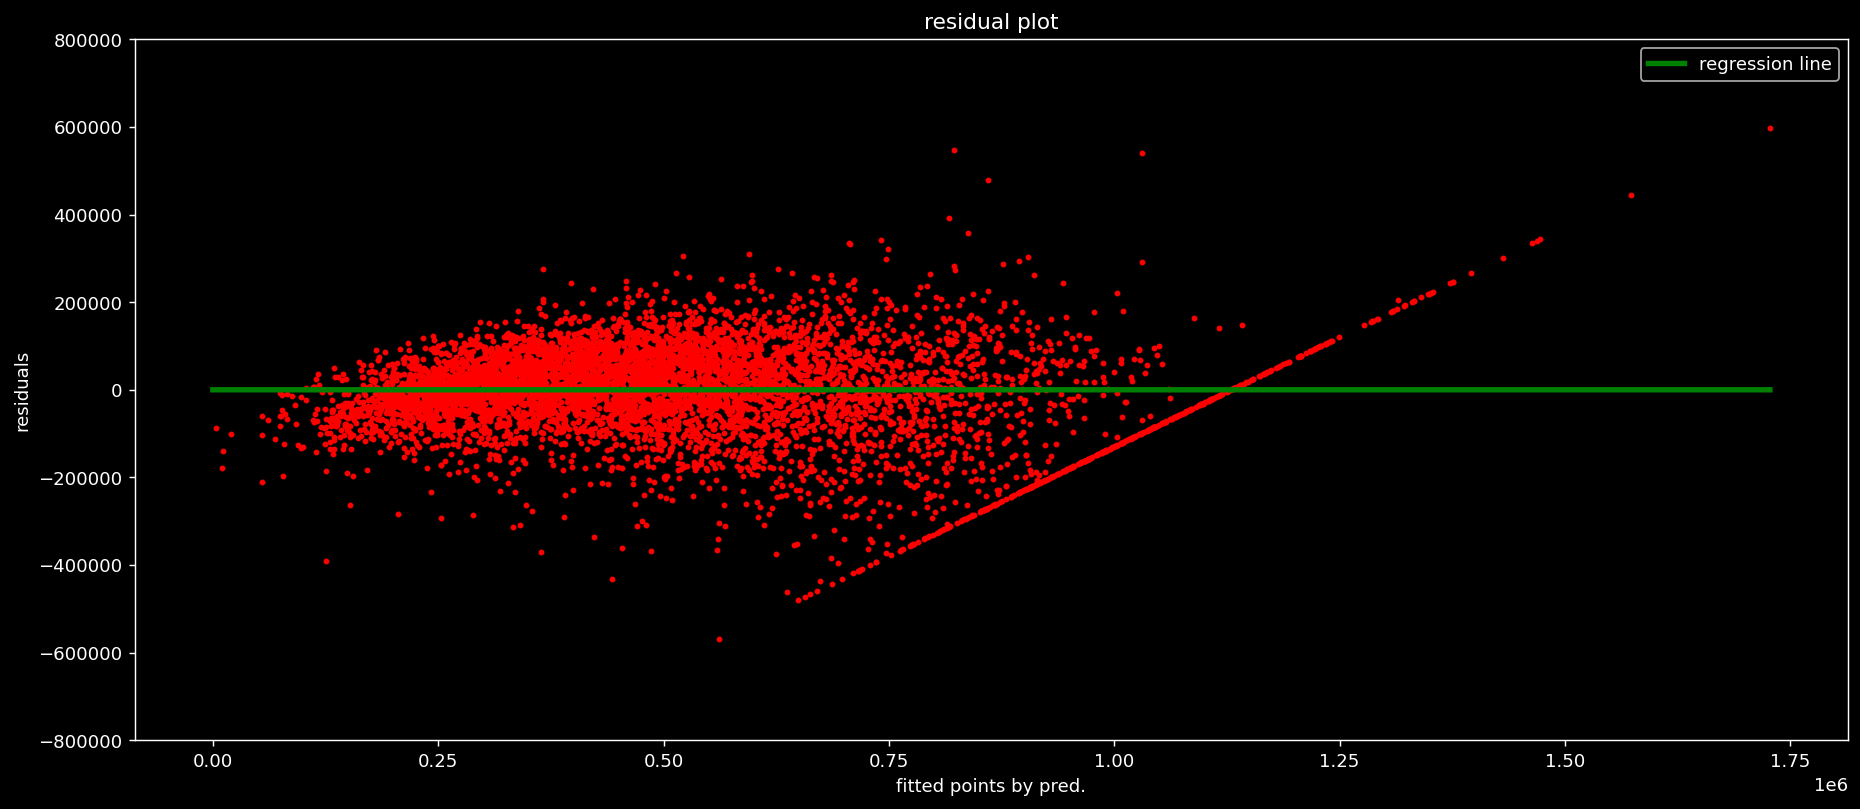

In [30]:
plt.figure(dpi = 130 , figsize = (17,7))
plt.scatter(residual_table.predictions , residual_table.residuals , color = 'red' , s = 5)
plt.plot(z , k , color = 'green' , linewidth = 3 , label = 'regression line')
plt.ylim(-800000,800000)
plt.xlabel('fitted points by pred.')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

# distribution of errors

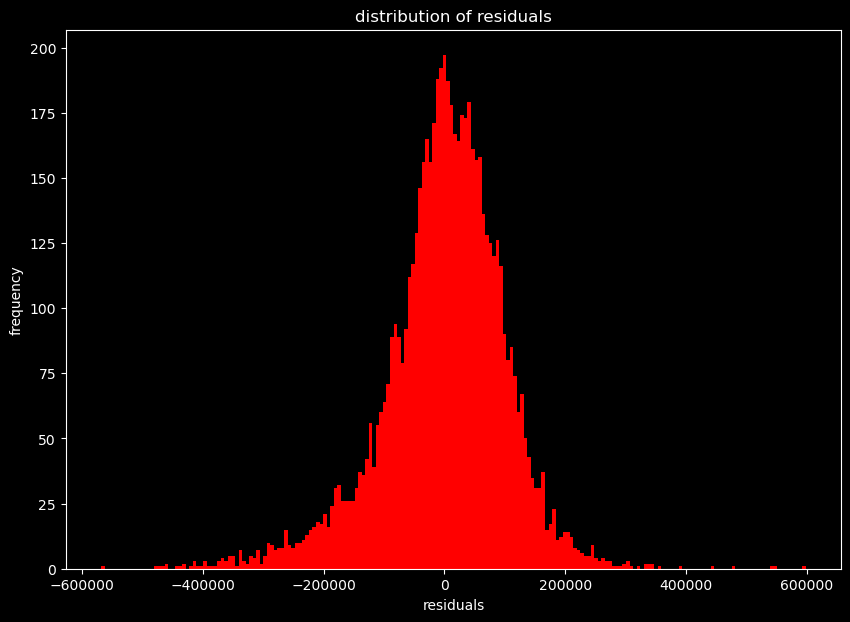

In [32]:
plt.figure(dpi = 100 , figsize = (10,7))
plt.hist(residual_table.residuals , color = 'red' , bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

In [33]:
coeff_table = pd.DataFrame({'column' : x_train.columns , 
                           'coeff' : lr.coef_})
coeff_table = coeff_table.sort_values(by = 'coeff')

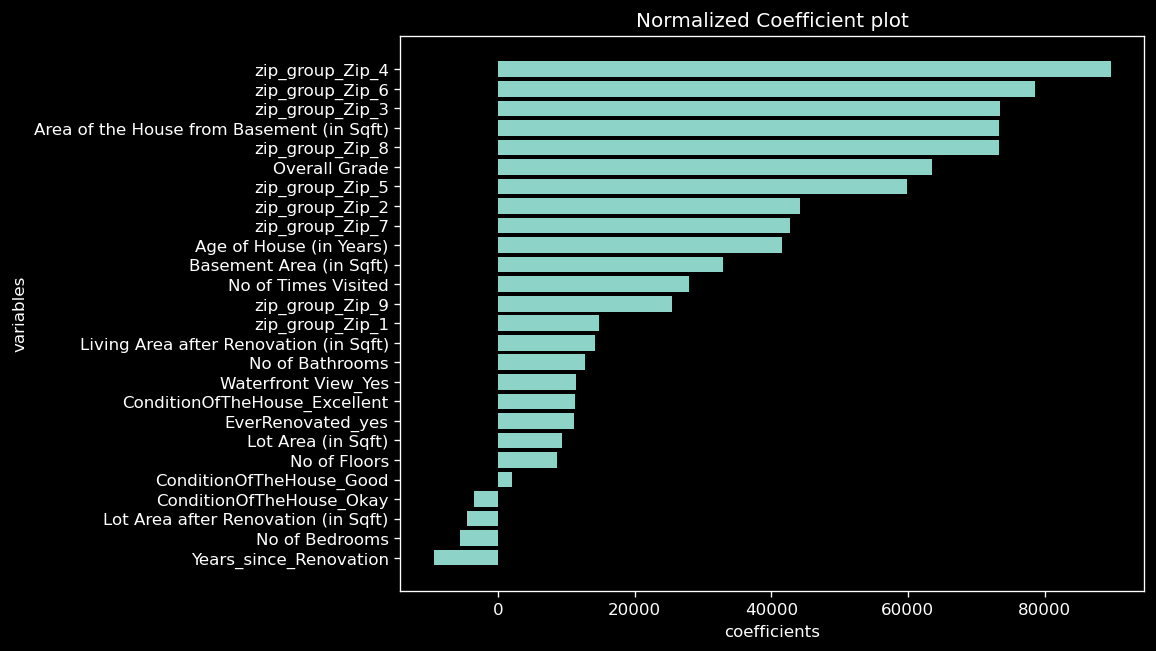

In [34]:
plt.figure(figsize = (8,6) , dpi = 120)
X = coeff_table.column
Y = coeff_table.coeff
plt.barh(X,Y)
plt.xlabel('coefficients')
plt.ylabel('variables')
plt.title('Normalized Coefficient plot')
plt.show()